## About the Data

I will be making use of a kaggle dataset: https://www.kaggle.com/datasets/kaggler2412/dementia-patient-health-and-prescriptions-dataset?resource=download

### Feature Columns
Diabetic (Binary): Indicates whether a patient has been diagnosed with diabetes (1 for yes, 0 for no).

Alcohol Level (Continuous): Measures the alcohol consumption level of patients, possibly reflecting lifestyle choices.

Heart Rate (Continuous): Denotes the number of heartbeats per minute, a critical indicator of cardiovascular health.

Blood Oxygen Level (Continuous): The saturation of oxygen in the blood, a vital sign of respiratory function.

Body Temperature (Continuous): The measured temperature of the body in Celsius, indicating potential fever or hypothermia.

Weight (Continuous): The mass of the patient in kilograms, a fundamental measure of health.

MRI Delay (Continuous): The time delay in obtaining an MRI scan, potentially indicative of the progression or severity of medical conditions.

Prescription: The specific medication prescribed to the patient, relevant for treatment analysis.

Dosage in mg (Continuous): The amount of medication prescribed, critical for dosage-effect studies.

Age (Continuous): The age of the patient, an essential demographic factor.

Education_Level: The highest level of education attained by the patient, which may correlate with health literacy.

Dominant_Hand: Indicates the dominant hand of the patient, which could relate to neurological functions.

Gender: The gender of the patient, a key demographic characteristic.

Family_History: Indicates a family history of dementia, a significant risk factor.

Smoking_Status: Reflects the patient's smoking habits, an important lifestyle indicator.

APOE_ε4: Shows the presence of the APOE ε4 allele, a genetic variant associated with Alzheimer's disease.

Physical_Activity: The level of physical activity of the patient, highlighting lifestyle impacts on health.

Depression_Status: Indicates whether the patient has depression, which can be related to cognitive health.

Cognitive_Test_Scores (Continuous): Scores from cognitive tests, direct measures of cognitive function.

Medication_History: Records whether the patient has a history of medication use, relevant for drug interactions.

Nutrition_Diet: Describes the patient's diet, an important health factor.

Sleep_Quality: Assesses the quality of the patient's sleep, a critical aspect of health.

Chronic_Health_Conditions: Notes any chronic health conditions the patient has, key for comorbidity studies.

Dementia (Binary): Serves as the target variable, indicating the presence (1) or absence (0) of dementia.

This dataset serves as a rich source for analysis, providing a multifaceted view of factors that may contribute to the onset and progression of dementia. It is a valuable resource for researchers looking to explore the complex interplay between lifestyle, genetics, and health outcomes. From PUBMED, Online research sources, NHS, Google scholar and consultation with healthcare professionals.




## Importing Necessary Libraries

In [1]:
#installin keras
!pip install keras

In [2]:
#Installing scikeras
!pip install scikeras

In [3]:
#Installing Bayesian Optimization
!pip install bayesian-optimization

In [4]:
#Installing scikit optimize library
!pip install scikit-optimize

In [5]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

#Importing Sklearn libraries
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, cross_val_score
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, classification_report, precision_score, f1_score, roc_auc_score, roc_curve, ConfusionMatrixDisplay, make_scorer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier

from sklearn.linear_model import LogisticRegression, LinearRegression

from sklearn.decomposition import PCA
from skopt import BayesSearchCV

from lightgbm import LGBMClassifier

import warnings
from termcolor import colored
warnings.filterwarnings("ignore")

In [6]:
#import tensorflow as tf
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import InputLayer
#from tensorflow.keras.regularizers import l1_l2
#from tensorflow.keras.layers import Dense, Dropout
#from tensorflow.keras.callbacks import EarlyStopping

In [7]:
#Importing deep learning libraries
import keras
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from scikeras.wrappers import KerasClassifier
from math import floor
from bayes_opt import BayesianOptimization
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)

## Importing Data

In [8]:
#Importing the data
dementia = pd.read_csv('dementia_data.csv')

## Exploratory Data Analysis

In [9]:
#Displaying the first 5 rows of our dataset
dementia.head()

,Diabetic,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,Prescription,Dosage in mg,Age,...,Smoking_Status,APOE_ε4,Physical_Activity,Depression_Status,Cognitive_Test_Scores,Medication_History,Nutrition_Diet,Sleep_Quality,Chronic_Health_Conditions,Dementia
0,1,0.084974,98,96.230743,36.224852,57.563978,36.421028,NaN,NaN,60,...,Current Smoker,Negative,Sedentary,No,10,No,Low-Carb Diet,Poor,Diabetes,0
1,0,0.016973,78,93.032122,36.183874,56.832335,31.157633,Galantamine,12.0,61,...,Former Smoker,Positive,Moderate Activity,No,1,Yes,Low-Carb Diet,Poor,Heart Disease,1
2,0,0.009000,89,93.566504,37.326321,59.759066,37.640435,NaN,NaN,69,...,Former Smoker,Negative,Moderate Activity,No,8,No,Mediterranean Diet,Poor,Heart Disease,0
3,0,0.086437,60,93.906510,37.030620,58.266471,50.673992,Donepezil,23.0,78,...,Never Smoked,Negative,Mild Activity,Yes,5,Yes,Balanced Diet,Poor,Hypertension,1
4,1,0.150747,67,97.508994,36.062121,67.705027,27.810601,Memantine,20.0,77,...,Never Smoked,Positive,Mild Activity,No,0,Yes,Low-Carb Diet,Good,Diabetes,1


In [10]:
#Looking at basic information of our dataset
dementia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Diabetic                   1000 non-null   int64  
 1   AlcoholLevel               1000 non-null   float64
 2   HeartRate                  1000 non-null   int64  
 3   BloodOxygenLevel           1000 non-null   float64
 4   BodyTemperature            1000 non-null   float64
 5   Weight                     1000 non-null   float64
 6   MRI_Delay                  1000 non-null   float64
 7   Prescription               485 non-null    object 
 8   Dosage in mg               485 non-null    float64
 9   Age                        1000 non-null   int64  
 10  Education_Level            1000 non-null   object 
 11  Dominant_Hand              1000 non-null   object 
 12  Gender                     1000 non-null   object 
 13  Family_History             1000 non-null   object

In [11]:
# Displaying the summary of our dataset
round(dementia.describe().transpose(), 4)

,count,mean,std,min,25%,50%,75%,max
Diabetic,1000.0,0.5130,0.5001,0.0000,0.0000,1.0000,1.0000,1.0000
AlcoholLevel,1000.0,0.0984,0.0587,0.0004,0.0455,0.0982,0.1518,0.1999
HeartRate,1000.0,79.3830,12.1076,60.0000,68.0000,79.0000,90.0000,100.0000
BloodOxygenLevel,1000.0,95.2261,2.9293,90.0107,92.8750,95.3904,97.7851,99.9992
BodyTemperature,1000.0,36.7615,0.4317,36.0021,36.3954,36.7843,37.1267,37.4968
Weight,1000.0,74.3213,14.4638,50.0697,61.3873,74.1492,87.0240,99.9827
MRI_Delay,1000.0,30.1036,16.8622,0.0947,16.2374,29.5772,44.1767,59.9576
Dosage in mg,485.0,9.2134,6.4932,1.5000,4.0000,8.0000,12.0000,23.0000
Age,1000.0,74.9080,9.0951,60.0000,67.0000,75.0000,83.0000,90.0000
Cognitive_Test_Scores,1000.0,6.3830,3.1806,0.0000,4.0000,8.0000,9.0000,10.0000


In [12]:
#Counting the number of subjects in each group
dementia['Dementia'].value_counts()

Dementia
0    515
1    485
Name: count, dtype: int64

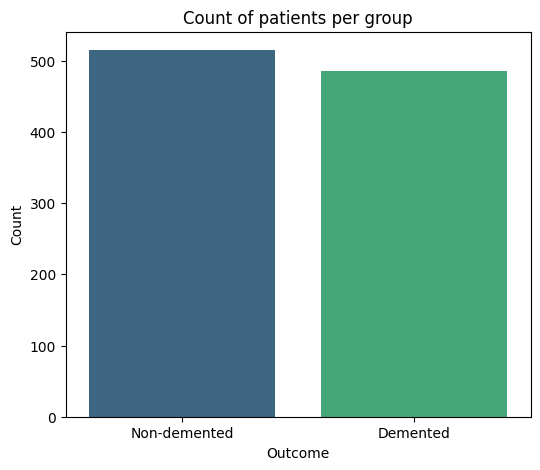

In [13]:
#Visualizing the outcome of the patients in the dataset
fig = plt.figure(figsize=(6,5))
grid_spec = fig.add_gridspec(1,1)
ax = fig.add_subplot(grid_spec[0,0])
sns.countplot(data=dementia, x='Dementia', ax= ax, palette = 'viridis')

ax.set_xlabel("Outcome")
ax.set_ylabel("Count")
ax.set_xticklabels(["Non-demented","Demented"])
plt.title('Count of patients per group')
plt.show()



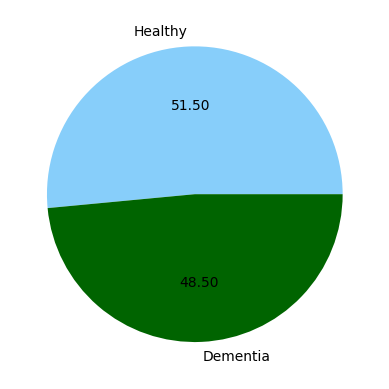

In [14]:
#Displaying the count of the patients in each group as a pie chart
plt.pie(dementia['Dementia'].value_counts(), autopct='%.2f', labels=['Healthy','Dementia' ], colors=['lightskyblue','darkgreen'])
plt.show()

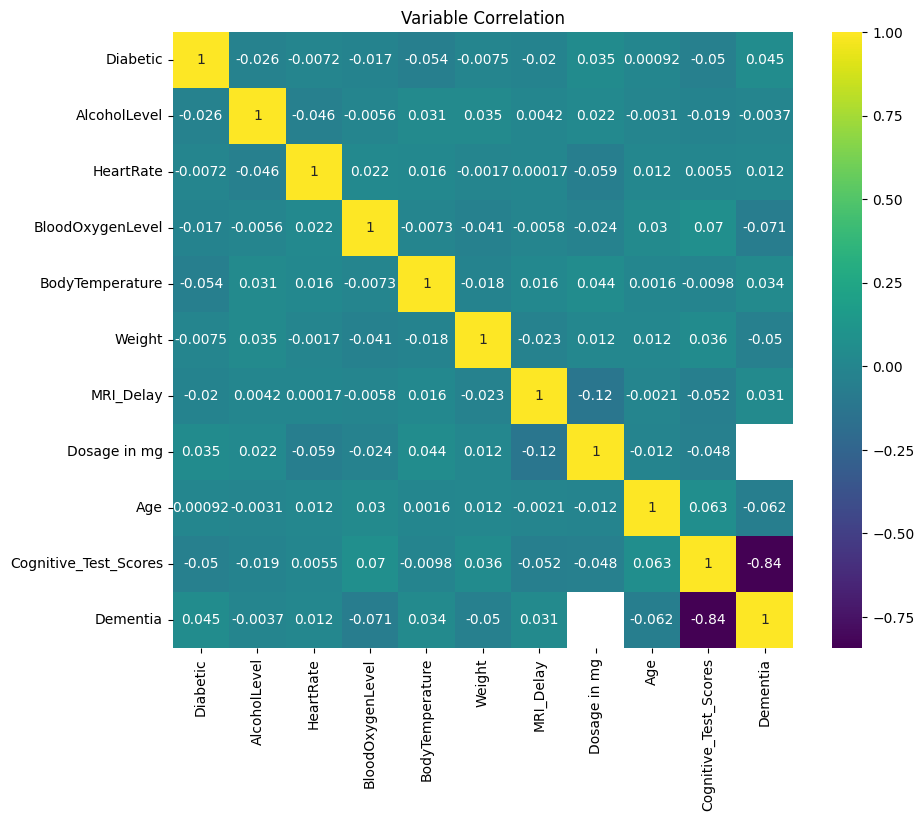

In [15]:
# Viewing the correlation between the variables
fig = plt.figure(figsize=(10,8))
sns.heatmap(dementia.corr(numeric_only=True), annot = True, cmap='viridis')
plt.title('Variable Correlation')
plt.show()

In [16]:
numeric_columns = dementia.select_dtypes(exclude='object')
numeric_columns.iloc[:,:-1]

,Diabetic,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,Dosage in mg,Age,Cognitive_Test_Scores
0,1,0.084974,98,96.230743,36.224852,57.563978,36.421028,NaN,60,10
1,0,0.016973,78,93.032122,36.183874,56.832335,31.157633,12.0,61,1
2,0,0.009000,89,93.566504,37.326321,59.759066,37.640435,NaN,69,8
3,0,0.086437,60,93.906510,37.030620,58.266471,50.673992,23.0,78,5
4,1,0.150747,67,97.508994,36.062121,67.705027,27.810601,20.0,77,0
...,...,...,...,...,...,...,...,...,...,...
995,1,0.081825,87,93.851963,36.495134,50.380106,42.318663,10.0,88,5
996,1,0.145249,97,94.522391,36.270804,94.006484,52.812568,NaN,80,9
997,1,0.073692,65,98.578388,37.065703,80.088613,13.640229,NaN,67,8
998,0,0.037347,71,91.298580,37.037202,95.322210,17.445715,20.0,62,2


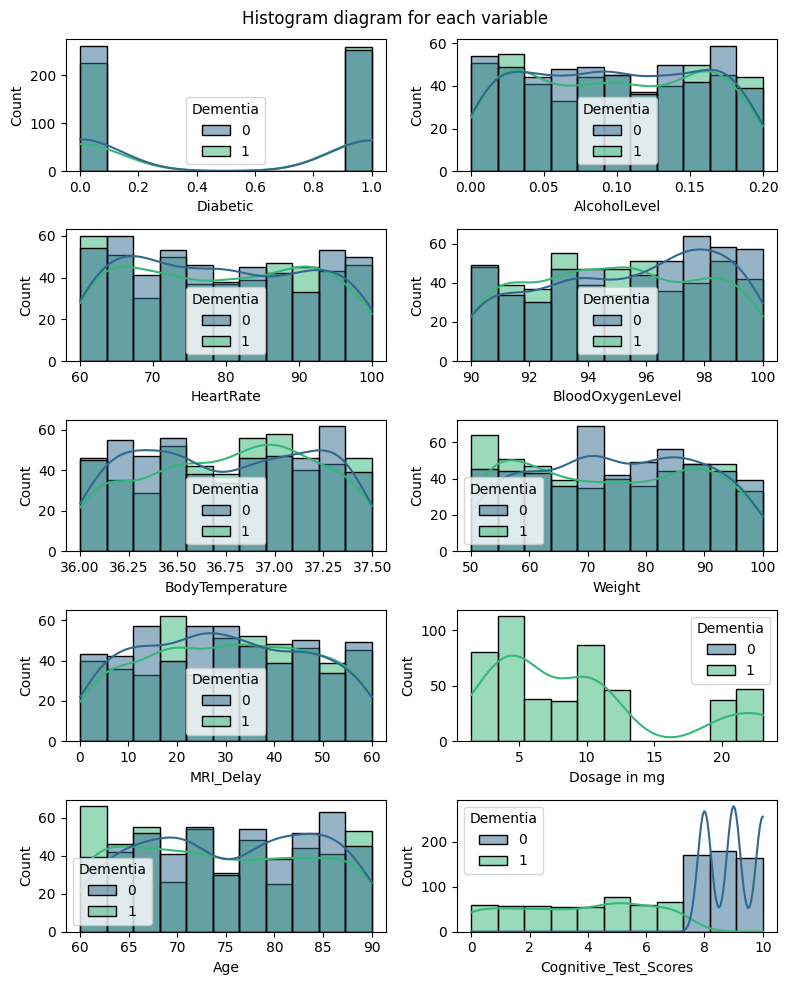

In [17]:
#sns.histplot(data=dementia, x='Age', bins=30)
# Showing the distribution for each variable
fig, axes = plt.subplots(5,2, figsize = (8,10))

#Using a for loop to create subplots for each variable
for i, column in enumerate(numeric_columns.iloc[:,:-1]):
    sns.histplot(data=dementia, x=dementia[column], ax = axes[i//2,i%2], kde=True, hue=dementia['Dementia'], palette='viridis')
    # The // and % operators help determine the row and column index respectively
    plt.xlabel(column)

fig.suptitle('Histogram diagram for each variable')
plt.tight_layout()
plt.show()

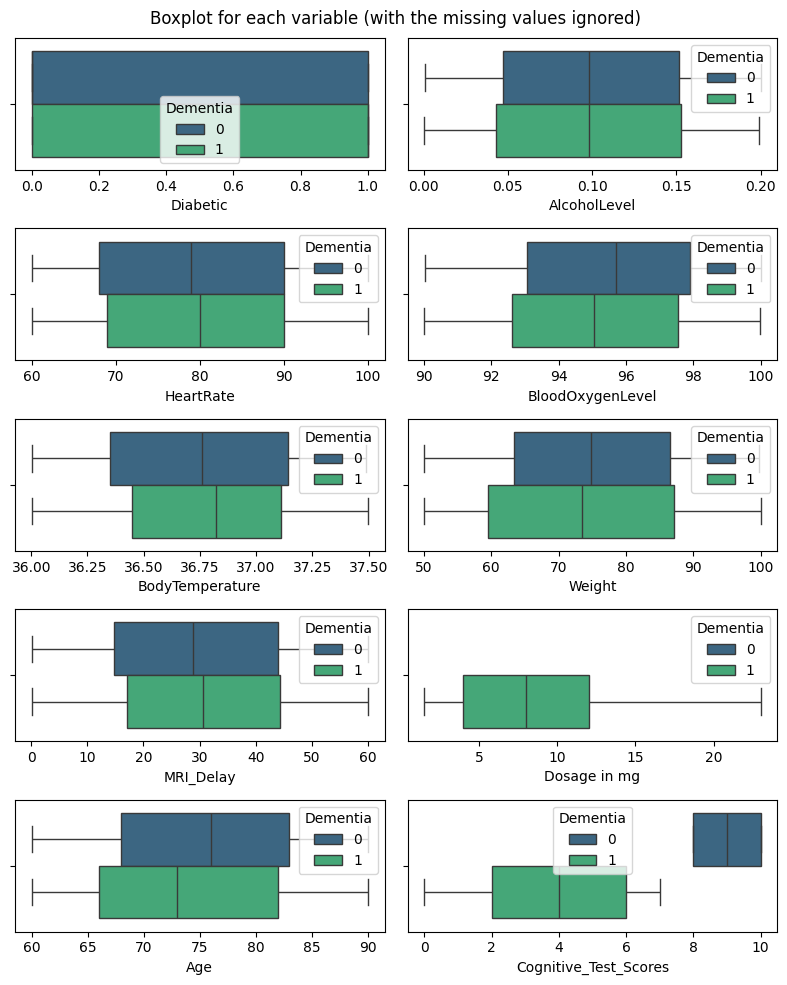

In [18]:
#sns.histplot(data=dementia, x='Age', bins=30)
# Showing the distribution for each variable
fig, axes = plt.subplots(5,2, figsize = (8,10))

#Using a for loop to create subplots for each variable
for i, column in enumerate(numeric_columns.iloc[:,:-1]):
    sns.boxplot(data=dementia, x=dementia[column], ax = axes[i//2,i%2], hue=dementia['Dementia'], palette='viridis')
    # The // and % operators help determine the row and column index respectively
    plt.xlabel(column)

fig.suptitle('Boxplot for each variable (with the missing values ignored)')
plt.tight_layout()
plt.show()

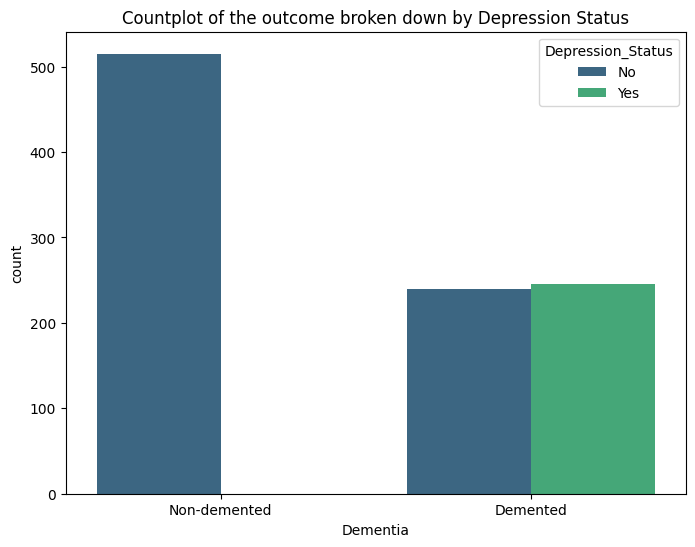

In [19]:
# Comparing the depression status per group
fig1= plt.figure(figsize = (8,6))
grid_spec = fig1.add_gridspec(1,1)
ax = fig1.add_subplot(grid_spec[0,0])
sns.countplot(data=dementia, hue = 'Depression_Status', x='Dementia', palette='viridis')
plt.title('Countplot of the outcome broken down by Depression Status')
ax.set_xticklabels(["Non-demented","Demented"])
ax.set_xlabel("Dementia")
plt.show()

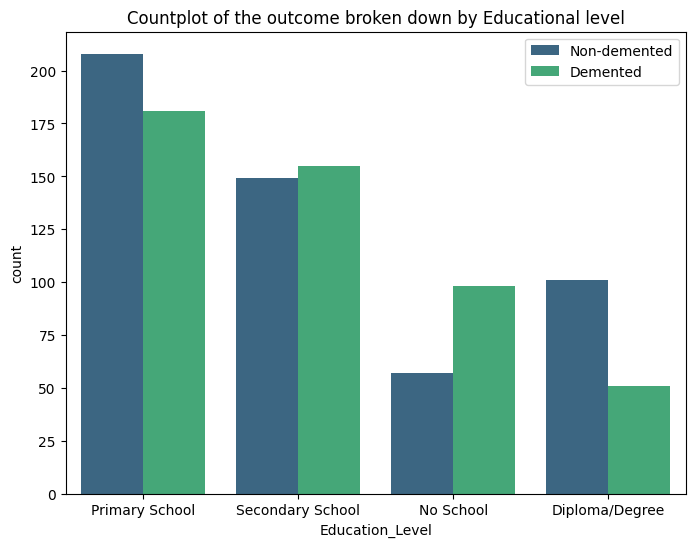

In [20]:
# Comparing the outcome of patients broken down by educational level
plt.figure(figsize = (8,6))
sns.countplot(data=dementia, x='Education_Level', hue='Dementia', palette='viridis')
plt.title('Countplot of the outcome broken down by Educational level')
plt.legend(labels= ['Non-demented', 'Demented'])
plt.show()

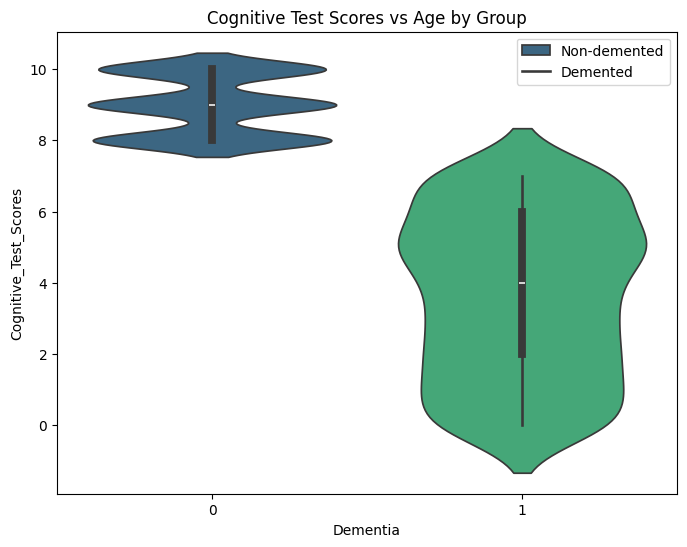

In [21]:
# Visualizing the distribution of Cognitive Scores broken down by outcome
plt.figure(figsize = (8,6))
sns.violinplot(data=dementia, y='Cognitive_Test_Scores', x='Dementia', hue='Dementia', palette='viridis')
plt.title('Cognitive Test Scores vs Age by Group')
plt.legend(labels= ['Non-demented', 'Demented'])
plt.show()

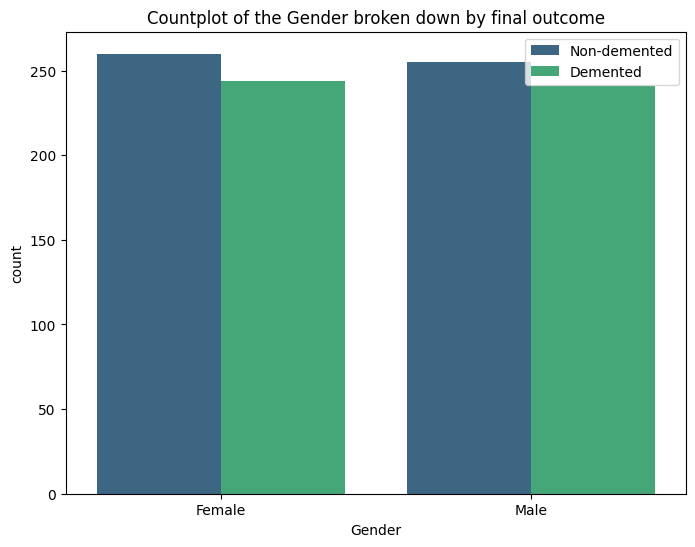

In [22]:
# Comparing the male and female patients per group
fig1= plt.figure(figsize = (8,6))
grid_spec = fig1.add_gridspec(1,1)
ax = fig1.add_subplot(grid_spec[0,0])
sns.countplot(data=dementia, x='Gender', hue='Dementia', palette='viridis')
plt.title('Countplot of the Gender broken down by final outcome')
ax.set_xlabel("Gender")
plt.legend(labels= ['Non-demented', 'Demented'])
plt.show()

Findings and decisions made:

*  Both outcomes of the Dementia variable are fairly balanced
*  There is a balance in the amount of men and women that turned out to be positive and negative
*  

*  **Finding**: Dosage in mg and prescription variables only have values for records that have Dementia present thus the presence of a prescription and dosage is strong indicator of dementia +ve.

*  All dementia patients have a cognitive score below 8 while non-dementia patients have a cognitive score between 8 and 10

*  Every patient without dementia is also not depressed
* Patients with primary school education level have the highest count in the dataset and also the highest number of dementia patients
* Diploma/Degree level patients have the lowest count of dementia


## Data Preprocessing

### Handling Missing values

There are some missing values present in the chronic health conditions columns. Based on the fact that this is a categorical column, I assume that the missing values have a meaning, i.e. there was no chronic health condition present.

In [23]:
#Replacing missing values with 'None'
dementia['Chronic_Health_Conditions']= dementia['Chronic_Health_Conditions'].replace(np.nan, 'None')

In [24]:
# Displaying the count of the number of samples for each Chronic health class
dementia['Chronic_Health_Conditions'].value_counts()

Chronic_Health_Conditions
Diabetes         513
None             179
Heart Disease    155
Hypertension     153
Name: count, dtype: int64

### Variable Encoding

In [25]:
#Encoding the Educational level variable with the pandas replace() function

dementia['Education_Level']= dementia['Education_Level'].replace({'No School':0, 'Primary School':1, 'Secondary School':2, 'Diploma/Degree':3})

In [26]:
#Encoding the Dominant_Hand, gender, smoking status, physical activity, Chronic health condition variable using get_dummies

dummy_var = pd.get_dummies(data=dementia[['Dominant_Hand', 'Gender', 'Smoking_Status', 'Physical_Activity', 'Nutrition_Diet',	'Sleep_Quality', 'Chronic_Health_Conditions']], columns=['Dominant_Hand', 'Gender', 'Smoking_Status', 'Physical_Activity', 'Nutrition_Diet',	'Sleep_Quality', 'Chronic_Health_Conditions'], drop_first=True, dtype=int)
dementia = pd.concat([dementia, dummy_var], axis=1)

In [27]:
#Encoding the rest with label encoder
ord_encoder = OrdinalEncoder()
dementia[['Family_History',	'APOE_ε4',	'Depression_Status',	'Medication_History']]= ord_encoder.fit_transform(dementia[['Family_History',	'APOE_ε4',	'Depression_Status',	'Medication_History']])

### Dropping Variables

Based on our analysis above, several variables would need to be dropped.

*   Dosage in mg and Prescription would need to be dropped as they are leakage features.The presence of a value for both these variables indicates a presence of Dementia. It is not a factor that influences Dementia but rather it is prompted by the presence of Dementia.
*   The variables that were encoded above would need to be dropped as well


In [28]:
#Dropping the leakage features
dementia.drop(columns=['Dosage in mg', 'Prescription'], inplace=True)

In [29]:
#Dropping the already encoded features
dementia.drop(columns=['Dominant_Hand', 'Gender', 'Smoking_Status', 'Physical_Activity', 'Nutrition_Diet',	'Sleep_Quality', 'Chronic_Health_Conditions'], inplace=True)

In [30]:
dementia.head()

,Diabetic,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,Age,Education_Level,Family_History,...,Smoking_Status_Former Smoker,Smoking_Status_Never Smoked,Physical_Activity_Moderate Activity,Physical_Activity_Sedentary,Nutrition_Diet_Low-Carb Diet,Nutrition_Diet_Mediterranean Diet,Sleep_Quality_Poor,Chronic_Health_Conditions_Heart Disease,Chronic_Health_Conditions_Hypertension,Chronic_Health_Conditions_None
0,1,0.084974,98,96.230743,36.224852,57.563978,36.421028,60,1,0.0,...,0,0,0,1,1,0,1,0,0,0
1,0,0.016973,78,93.032122,36.183874,56.832335,31.157633,61,2,0.0,...,1,0,1,0,1,0,1,1,0,0
2,0,0.009000,89,93.566504,37.326321,59.759066,37.640435,69,1,1.0,...,1,0,1,0,0,1,1,1,0,0
3,0,0.086437,60,93.906510,37.030620,58.266471,50.673992,78,2,1.0,...,0,1,0,0,0,0,1,0,1,0
4,1,0.150747,67,97.508994,36.062121,67.705027,27.810601,77,2,1.0,...,0,1,0,0,1,0,0,0,0,0


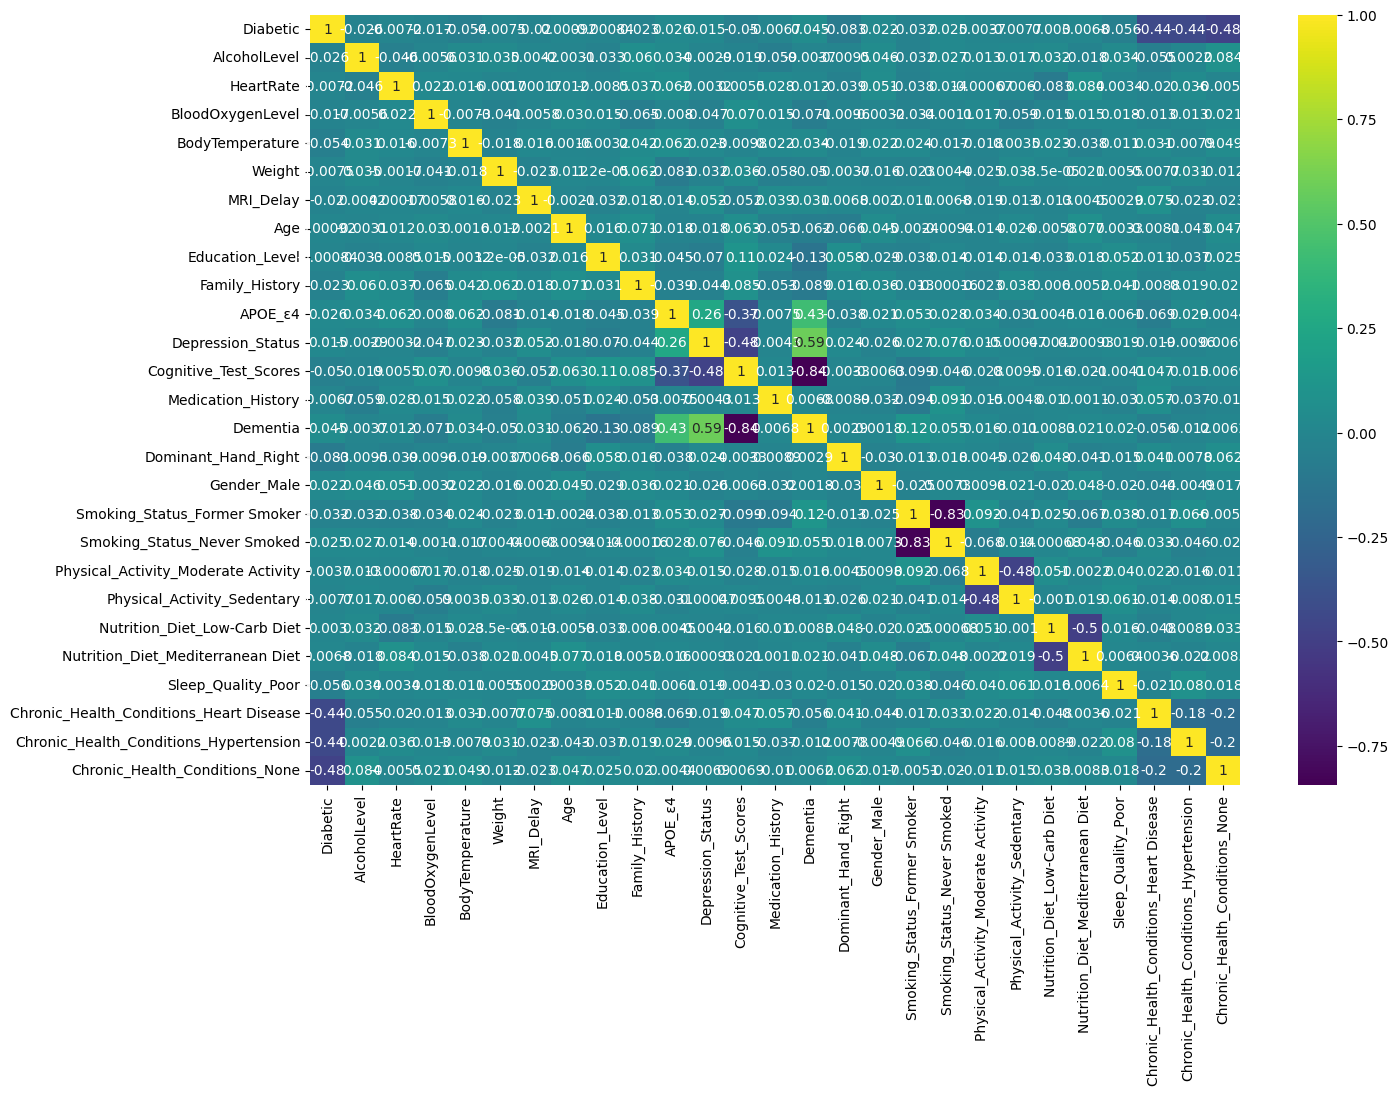

In [31]:
#Feature correlation after encoding
fig = plt.figure(figsize=(15,10))
sns.heatmap(dementia.corr(numeric_only=True), annot = True, cmap='viridis')
plt.show()

### Reducing Dimensionality using PCA

There are some highly correlated independent variables. This needs to be handles else it will result in multicollinearity

In [32]:
#Splitting the data into X and y components
features=dementia.drop('Dementia', axis=1)
target = dementia['Dementia']

Calling train_test_split on my data

In [33]:
X_train, X_test, y_train, y_test = train_test_split(features,target,test_size=0.3, random_state=1)

In [34]:
# Scaling the X components using a pipeline
pipeline = Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components=7))])

X_train = pipeline.fit_transform(X_train)

In [35]:
#Applying transformations to test set
X_test = pipeline.transform(X_test)

## Building the Models

### Machine learning models

The models are tuned using BayesSearchCV for the traditional models and Bayesian Optimization for the deep learning model. The entire tuning sections are commented out as the optimal parameters have been chosen

Tuning the Machine Learning models

In [36]:
# # Define models and their hyperparameter spaces to carry out a search
# models = {
#     'RandomForest': (RandomForestClassifier(), {
#         'criterion': ['gini', 'log_loss'],
#         'n_estimators': [100, 200, 300, 400, 500, 600, 800, 1000, 1500, 2000],
#         'max_depth': [None, 10, 20],
#         'min_samples_split': [2,3,4,5],
#         'class_weight':[None, 'balanced']
#     }),
#     'SVC': (SVC(probability=True), {
#         'C': [0.1, 1, 5, 10],
#         'kernel': ['linear', 'rbf', 'sigmoid'],
#         'gamma': [0.1,0.5, 1]
#     }),
#     'Knn': (KNeighborsClassifier(), {
#         "n_neighbors": np.arange(1, 51),
#         "metric": ["manhattan", "euclidean", "chebyshev", 'minkowski', 'hamming'],
#         'p': [1,2,3,4,5]
#     }),
#     'logreg': (LogisticRegression(), {
#         'penalty': ['l2'],
#         'C': [0.1,0.2,0.5, 1.0, 2,4, 10.0]
#         #'solver':['liblinear', 'lbfgs', 'saga']
#     }),
#     'Adaboost': (AdaBoostClassifier(),{
#         'learning_rate' : [0.01, 0.02, 0.03, 0.04, 0.05, 0.08, 0.1, 0.2, 0.3, 0.4, 1],
#         'n_estimators' : [50, 100, 200, 300, 400, 500, 600, 800, 1000, 1500, 2000],
#         'estimator': [None,DecisionTreeClassifier(max_depth=3), LogisticRegression(), GradientBoostingClassifier(), RandomForestClassifier()],
#         'random_state': [0,1,42,101]
#     }),
#     'Dectree': (DecisionTreeClassifier(),{
#         'criterion': ['gini', 'entropy', 'log_loss'],
#         'max_depth': [1,5, 10, 20],
#         'min_samples_split': [2,3,4,5]
#     }),
#     'lgbm': (LGBMClassifier(objective='binary', verbose=-1), {
#         'boosting_type': ['gbdt', 'dart', 'goss', 'random_forest'],
#         'learning_rate' : [0.01, 0.02, 0.04, 0.05, 0.08, 0.1, 0.2, 0.3, 0.4, 0.8, 1],
#         'n_estimators' : [50, 100, 200, 300, 400, 500, 600, 800, 1000, 1500, 2000],
#         #'min_child_weight': [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
#         'min_child_samples': np.arange(1,30,2),
#         'max_depth': [1, 2, 3, 4, 5, 6, 7],
#         'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
#         'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100],
#         'num_leaves': np.arange(1,50),
#         'feature_fraction': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
#         'bagging_fraction': [0.01, 0.02, 0.04, 0.05, 0.08, 0.1, 0.2, 0.3, 0.4, 0.8,1]
#     })
# }


# # Perform hyperparameter tuning
# best_params = {}
# tuned_models = {}
# for model_name, (model, param_grid) in models.items():
#     search = BayesSearchCV(model, search_spaces=param_grid, n_iter = 50, cv=5, verbose = 2, error_score='raise', scoring='recall')
#     #search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=10, cv=5, error_score='raise', scoring='recall')
#     search.fit(X_train, y_train)
#     best_params[model_name] = search.best_params_
#     tuned_models[f"{model_name}_model"] = model.set_params(**best_params[model_name])

# print(best_params)

# #Displaying the tuned models and their parameters
# print(tuned_models)

In [37]:
#The final ML models
final_models={'Knn_model': KNeighborsClassifier(metric='chebyshev', n_neighbors=10, p=5),
            'Adaboost_model': AdaBoostClassifier(estimator=LogisticRegression(), learning_rate=0.01,
                   n_estimators=1500, random_state=1),
            'Dectree_model': DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_split=3)}

### Cross Validation

In [38]:
# Writing a function to calculate the specificity value for cross validation
def spec(clf, X, y):
  y_pred = clf.predict(X)
  cm = confusion_matrix(y, y_pred)
  tn = cm[0, 0]
  fp = cm[0, 1]
  fn = cm[1, 0]
  tp = cm[1, 1]
  specificity = tn/(tn+fp)
  #sensitivity = tp/(tp+fn)
  return specificity

Cross validating the models with 10-fold cross validation to see how well they will perform

In [39]:
#Carrying out cross validation and displaying the score for each model
score_list={}
for model in final_models.values():
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state = 1)
    score = cross_validate(model,  X_train, y_train, cv=kfold, scoring={'accuracy':'accuracy', 'specificity':spec, 'recall':'recall'})
    #Outputting only the mean of the accuracy of the 10 splits
    score_list[f"{model.__class__.__name__}"]=score


# Storing the scores in a list so it can be displayed as a dataframe
scoring = []
for name, metric_list in score_list.items():
    single_scores = {}
    for metric, scores in metric_list.items():
        single_scores['Model']= name
        single_scores[metric]=scores.mean()
    scoring.append(single_scores)
print(scoring)

[{'Model': 'KNeighborsClassifier', 'fit_time': 0.006580471992492676, 'score_time': 0.07262594699859619, 'test_accuracy': 0.89, 'test_specificity': 0.9553174603174602, 'test_recall': 0.8216806722689075}, {'Model': 'AdaBoostClassifier', 'fit_time': 7.231647372245789, 'score_time': 0.7092146396636962, 'test_accuracy': 0.9414285714285715, 'test_specificity': 0.9553174603174602, 'test_recall': 0.926890756302521}, {'Model': 'DecisionTreeClassifier', 'fit_time': 0.004759073257446289, 'score_time': 0.00540771484375, 'test_accuracy': 0.9057142857142857, 'test_specificity': 0.9162698412698413, 'test_recall': 0.8949579831932774}]


In [40]:
# Displaying the results of the cross validation as a dataframe
crossval=pd.DataFrame(scoring).sort_values(by=['test_recall', 'test_accuracy'], ascending=False).reset_index().drop('index', axis=1)
crossval

,Model,fit_time,score_time,test_accuracy,test_specificity,test_recall
0,AdaBoostClassifier,7.231647,0.709215,0.941429,0.955317,0.926891
1,DecisionTreeClassifier,0.004759,0.005408,0.905714,0.916270,0.894958
2,KNeighborsClassifier,0.006580,0.072626,0.890000,0.955317,0.821681


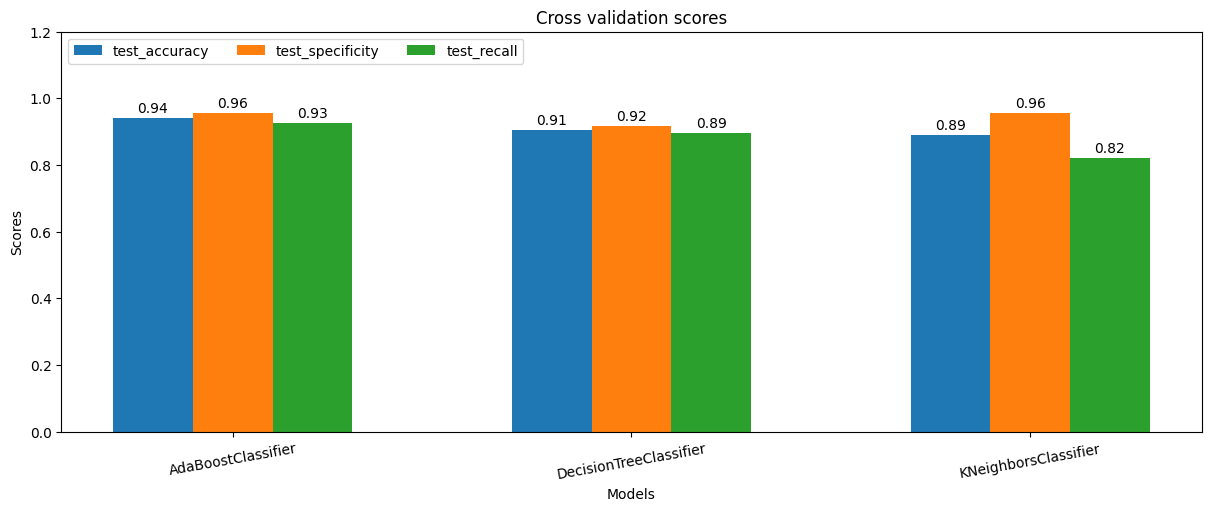

In [41]:
#Plotting the cross-validation scores
x = np.arange(len(crossval))  # the label locations
width = 0.20  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=(12,5))

for col in crossval.columns[3:]:
    offset = width * multiplier
    rects = ax.bar(x + offset, crossval[col], width, label=col)
    ax.bar_label(rects, padding=2, fmt='%.2f', label_type='edge')
    multiplier += 1

# Customizing the chart with labels and titles
ax.set_ylabel('Scores')
ax.set_xlabel('Models')
ax.set_title('Cross validation scores')
ax.set_xticks(x + width, crossval['Model'], rotation=10)
ax.legend(loc='upper left', ncols=7)
ax.set_ylim(0, 1.2)

plt.show()

### The Deep Learning model

In [42]:
# # Make scorer recall
# score_acc = make_scorer(accuracy_score)

In [43]:
# def nn_cl_bo2(neurons, activation, optimizer, learning_rate, batch_size, epochs,layers1, layers2, normalization,dropout, dropout_rate):
#     optimizerL = ['Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','SGD']
#     optimizerD= {'Adam':Adam(learning_rate=learning_rate), 'SGD':SGD(learning_rate=learning_rate),
#                  'RMSprop':RMSprop(learning_rate=learning_rate), 'Adadelta':Adadelta(learning_rate=learning_rate),
#                  'Adagrad':Adagrad(learning_rate=learning_rate), 'Adamax':Adamax(learning_rate=learning_rate),
#                  'Nadam':Nadam(learning_rate=learning_rate), 'Ftrl':Ftrl(learning_rate=learning_rate)}
#     # activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
#     #                'elu', 'exponential', LeakyReLU]
#     activationL = ['relu', 'selu', 'elu', LeakyReLU]
#     neurons = round(neurons)
#     activation = activationL[round(activation)]
#     optimizer = optimizerD[optimizerL[round(optimizer)]]
#     batch_size = round(batch_size)
#     epochs = round(epochs)
#     layers1 = round(layers1)
#     layers2 = round(layers2)
#     def nn_cl_fun2():
#         opt = Adam(learning_rate = learning_rate)
#         nn = Sequential()
#         nn.add(Dense(neurons, input_dim=7, activation=activation))
#         if normalization > 0.5:
#             nn.add(BatchNormalization())
#         for i in range(layers1):
#             nn.add(Dense(neurons, activation=activation))
#         if dropout > 0.5:
#             nn.add(Dropout(dropout_rate, seed=123))
#         else:
#             pass
#         for i in range(layers2):
#             nn.add(Dense(neurons, activation=activation))
#         nn.add(Dense(1, activation='sigmoid'))
#         nn.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
#         return nn
#     es = EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=20)
#     nn = KerasClassifier(build_fn=nn_cl_fun2, epochs=epochs, batch_size=batch_size,
#                          verbose=0)
#     kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
#     score = cross_val_score(nn, X_train, y_train, scoring=score_acc, cv=kfold, fit_params={'callbacks':[es]}).mean()
#     return score

In [44]:
# # Set paramaters
# params_nn1 ={
#     'neurons': (10, 200),
#     'activation':(0, 3),
#     'optimizer':(0,7),
#     'learning_rate':(0.001, 1),
#     'batch_size':(100, 1000),
#     'epochs':(20, 500),
#     'layers1':(1,4),
#     'layers2':(1,4),
#     'normalization':(0,1),
#     'dropout':(0,1),
#     'dropout_rate':(0,0.3)
# }
# # Run Bayesian Optimization
# nn_bo = BayesianOptimization(nn_cl_bo2, params_nn1, random_state=111)
# nn_bo.maximize(init_points=25, n_iter=4)

In [45]:
# params_nn_ = nn_bo.max['params']
# # activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
# #                'elu', 'exponential', LeakyReLU,'relu']
# activationL = ['relu', 'selu', 'elu', LeakyReLU]
# params_nn_['activation'] = activationL[round(params_nn_['activation'])]
# params_nn_['batch_size'] = round(params_nn_['batch_size'])
# params_nn_['epochs'] = round(params_nn_['epochs'])
# params_nn_['layers1'] = round(params_nn_['layers1'])
# params_nn_['layers2'] = round(params_nn_['layers2'])
# params_nn_['neurons'] = round(params_nn_['neurons'])
# optimizerL = ['Adam', 'SGD', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','Adam']
# learning_rate = params_nn_['learning_rate']
# optimizerD= {'Adam':Adam(learning_rate=learning_rate), 'SGD':SGD(learning_rate=learning_rate),
#              'RMSprop':RMSprop(learning_rate=learning_rate), 'Adadelta':Adadelta(learning_rate=learning_rate),
#              'Adagrad':Adagrad(learning_rate=learning_rate), 'Adamax':Adamax(learning_rate=learning_rate),
#              'Nadam':Nadam(learning_rate=learning_rate), 'Ftrl':Ftrl(learning_rate=learning_rate)}
# params_nn_['optimizer'] = optimizerD[optimizerL[round(params_nn_['optimizer'])]]
# params_nn_

The final model

In [46]:
parameters = {'activation': 'elu',
 'batch_size': 565,
 'dropout': 0.5892849231130379,
 'dropout_rate': 0.23994331589665707,
 'epochs': 103,
 'layers1': 1,
 'layers2': 2,
 'learning_rate': 0.052015295383710414,
 'neurons': 115,
 'normalization': 0.35184818333496226,
 'optimizer':'Nadam'}

In [47]:
# Fitting Neural Network
def nn_cl_fun():
    neural_net = Sequential()
    neural_net.add(Dense(parameters['neurons'], input_dim=7, activation=parameters['activation']))
    if parameters['normalization'] > 0.5:
        neural_net.add(BatchNormalization())
    for i in range(parameters['layers1']):
        neural_net.add(Dense(parameters['neurons'], activation=parameters['activation']))
    if parameters['dropout'] > 0.5:
        neural_net.add(Dropout(parameters['dropout_rate'], seed=123))
    for i in range(parameters['layers2']):
        neural_net.add(Dense(parameters['neurons'], activation=parameters['activation']))
    neural_net.add(Dense(1, activation='sigmoid'))
    neural_net.compile(loss='binary_crossentropy', optimizer=parameters['optimizer'], metrics=[keras.metrics.Accuracy(), keras.metrics.Recall()])
    return neural_net
es = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=10)
neural_net = KerasClassifier(build_fn=nn_cl_fun, epochs=parameters['epochs'], batch_size=parameters['batch_size'],
                         verbose=0)
neural_net.fit(X_train, y_train, validation_data=(X_test, y_test), verbose=1, callbacks=[es])

Epoch 1/103
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 357ms/step - accuracy: 0.0000e+00 - loss: 0.7042 - recall: 0.7126 - val_accuracy: 0.0000e+00 - val_loss: 0.5212 - val_recall: 0.8671
Epoch 2/103
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.0000e+00 - loss: 0.5001 - recall: 0.8508 - val_accuracy: 0.0000e+00 - val_loss: 0.4049 - val_recall: 0.9021
Epoch 3/103
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.0000e+00 - loss: 0.3841 - recall: 0.9027 - val_accuracy: 0.0000e+00 - val_loss: 0.3223 - val_recall: 0.9021
Epoch 4/103
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.0000e+00 - loss: 0.3044 - recall: 0.9097 - val_accuracy: 0.0000e+00 - val_loss: 0.2603 - val_recall: 0.9091
Epoch 5/103
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.0000e+00 - loss: 0.2481 - recall: 0.9071 - val_accuracy: 0.0000e+00 - val_loss: 0.2233 - val_recall: 0.9091
Epoch 6/103
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.0000e+00 - loss: 0.2090 - recall: 0.8982 - val_accuracy: 0.0000e+00 - val_l

KerasClassifier(
	model=None
	build_fn=<function nn_cl_fun at 0x7ea7020ec3a0>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=565
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=103
	class_weight=None
)

In [48]:
# Displaying the training history as a dataframe
losses = pd.DataFrame(neural_net.history_)

In [49]:
losses

,accuracy,loss,recall,val_accuracy,val_loss,val_recall
0,0.000000,0.695641,0.722222,0.000000,0.521232,0.867133
1,0.000000,0.496442,0.850877,0.000000,0.404894,0.902098
2,0.000000,0.380089,0.900585,0.000000,0.322287,0.902098
3,0.000000,0.303909,0.906433,0.000000,0.260337,0.909091
4,0.000000,0.249053,0.903509,0.000000,0.223332,0.909091
...,...,...,...,...,...,...
98,0.162857,0.098861,0.956140,0.160000,0.216394,0.923077
99,0.180000,0.098358,0.956140,0.153333,0.217820,0.930070
100,0.172857,0.094122,0.944444,0.163333,0.219611,0.930070
101,0.187143,0.098550,0.941520,0.170000,0.215607,0.930070


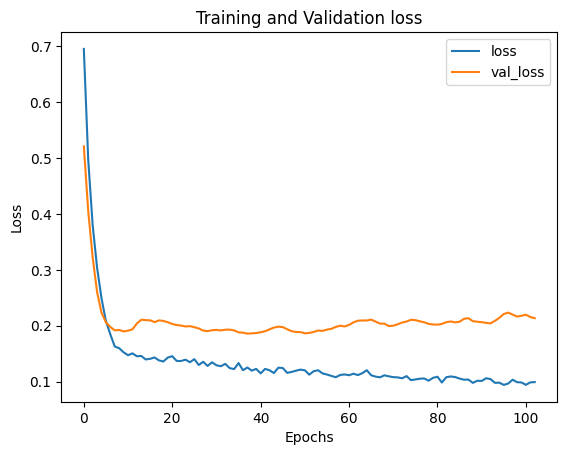

In [50]:
#Plotting the training and validation loss
losses[['loss', 'val_loss']].plot()
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

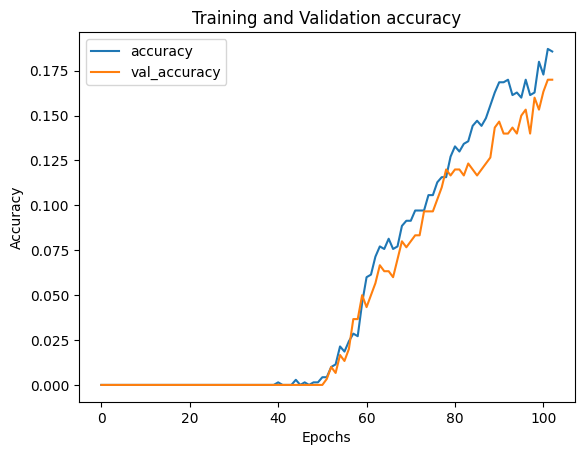

In [51]:
#Plotting the training and validation loss
losses[['accuracy', 'val_accuracy']].plot()
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [52]:
threshold = 0.5
y_neural_net = neural_net.predict(X_test)
y_neural_net_classes = (y_neural_net > threshold).astype(int)

In [53]:
# Writing a function to calculate the specificity value
def specificity(y_pred, y_test):
  cm = confusion_matrix(y_pred, y_test)
  tn = cm[0, 0]
  fp = cm[0, 1]
  fn = cm[1, 0]
  tp = cm[1, 1]
  spec = tn/(tn+fp)
  return spec

In [54]:
cm = confusion_matrix(y_test, y_neural_net_classes)
print(cm)
print(accuracy_score(y_test, y_neural_net_classes))
print(recall_score(y_test, y_neural_net_classes))
print(specificity(y_test, y_neural_net_classes))
print(precision_score(y_test, y_neural_net_classes))

[[150   7]
 [ 10 133]]
0.9433333333333334
0.9300699300699301
0.9554140127388535
0.95


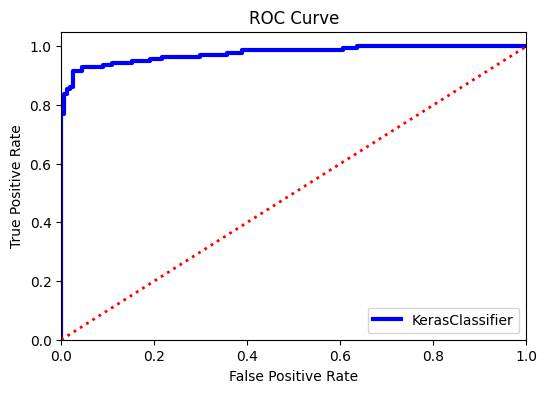

In [55]:
#Plotting the ROC curve

plt.figure(figsize=(6,4))
fpr, tpr, thresholds = roc_curve(y_test, neural_net.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label=f'{neural_net.__class__.__name__}', lw=3, color='blue')
plt.plot([0, 1], [0, 1], linestyle='dotted', lw=2, color='red')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Model Evaluation

In [56]:
#Adding the neural network to the final models dictionary for easy analysis
final_models['Neural_net'] = KerasClassifier(build_fn=nn_cl_fun, epochs=parameters['epochs'], batch_size=parameters['batch_size'],
                         verbose=0)

In [57]:
#Validating the list of models with the test data
model_eval = []
threshold = 0.5

for name, clf in final_models.items():
    clf.fit(X_train, y_train)
    if name == 'Neural_net':
        y_neural_net = neural_net.predict(X_test)
        y_predictions = (y_neural_net > threshold).astype(int)
    else:
        y_predictions = clf.predict(X_test)

    #Storing the relevant metrics in a dictionary
    eval={}
    eval['Model'] = clf.__class__.__name__
    eval['Accuracy']= round(accuracy_score(y_test, y_predictions), 3)
    eval['Specificity']= round(specificity(y_test, y_predictions), 3)
    eval['Recall/Sensitivity']= round(recall_score(y_test, y_predictions), 3)
    eval['Precision'] = round(precision_score(y_test, y_predictions), 3)
    eval['F1 score'] = round(f1_score(y_test, y_predictions), 3)
    eval['cm'] = confusion_matrix(y_test, y_predictions)
    model_eval.append(eval)

    # Displaying the results for each model
    print(f'Results for {clf.__class__.__name__} \n')
    print(f'Accuracy Score: {accuracy_score(y_test, y_predictions):.2f}')
    print(f'Specificity Score: {specificity(y_test, y_predictions):.2f}')
    print(f'Recall Score: {recall_score(y_test, y_predictions):.2f}')
    print(f'F1 score:{f1_score(y_test, y_predictions):.2f}')
    print(f'Classification Report \n{classification_report(y_test, y_predictions)}')
    print(f'Confusion Matrix \n{confusion_matrix(y_test, y_predictions)}')
    print(' \n')

Results for KNeighborsClassifier 

Accuracy Score: 0.88
Specificity Score: 0.92
Recall Score: 0.83
F1 score:0.87
Classification Report 
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       157
           1       0.90      0.83      0.87       143

    accuracy                           0.88       300
   macro avg       0.88      0.87      0.88       300
weighted avg       0.88      0.88      0.88       300

Confusion Matrix 
[[144  13]
 [ 24 119]]
 

Results for AdaBoostClassifier 

Accuracy Score: 0.90
Specificity Score: 0.91
Recall Score: 0.90
F1 score:0.90
Classification Report 
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       157
           1       0.90      0.90      0.90       143

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300

Confusion Matrix 
[[143  14]
 [ 

In [58]:
#Converting the dictionary of evaluation metrics to a dataframe
model_scores = pd.DataFrame(model_eval).sort_values(by=['Recall/Sensitivity', 'Accuracy'], ascending=False).reset_index().drop('index', axis=1)

#Extracting the single evaluation scores
model_scores_only = model_scores.drop('cm', axis=1)

#Extracting the confusion matrix for each model
model_matrix = model_scores[['Model', 'cm']]

#Displaying the single evaluation metrics of each model
model_scores_only

,Model,Accuracy,Specificity,Recall/Sensitivity,Precision,F1 score
0,KerasClassifier,0.943,0.955,0.930,0.950,0.940
1,DecisionTreeClassifier,0.877,0.841,0.916,0.840,0.876
2,AdaBoostClassifier,0.903,0.911,0.895,0.901,0.898
3,KNeighborsClassifier,0.877,0.917,0.832,0.902,0.865


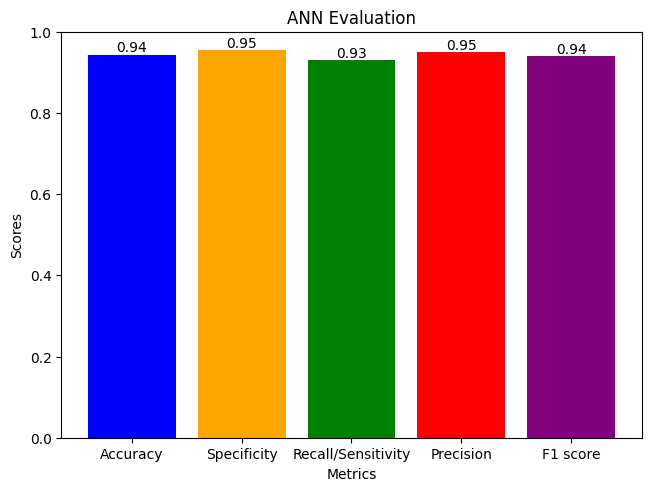

In [59]:
#Plotting the scores of the ANN model
ann_met=model_scores_only[model_scores_only['Model']=='KerasClassifier'].iloc[0][1:]

x = np.arange(5)
fig, ax = plt.subplots(layout='constrained')
g = ax.bar(x, ann_met, color= ['blue', 'orange', 'green', 'red', 'purple'])
ax.bar_label(g, fmt='%.2f')

ax.set_ylim(0,1.0)
ax.set_ylabel('Scores')
ax.set_xlabel('Metrics')
ax.set_xticks(x, model_scores_only.columns[1:])
ax.set_title('ANN Evaluation')
plt.show()

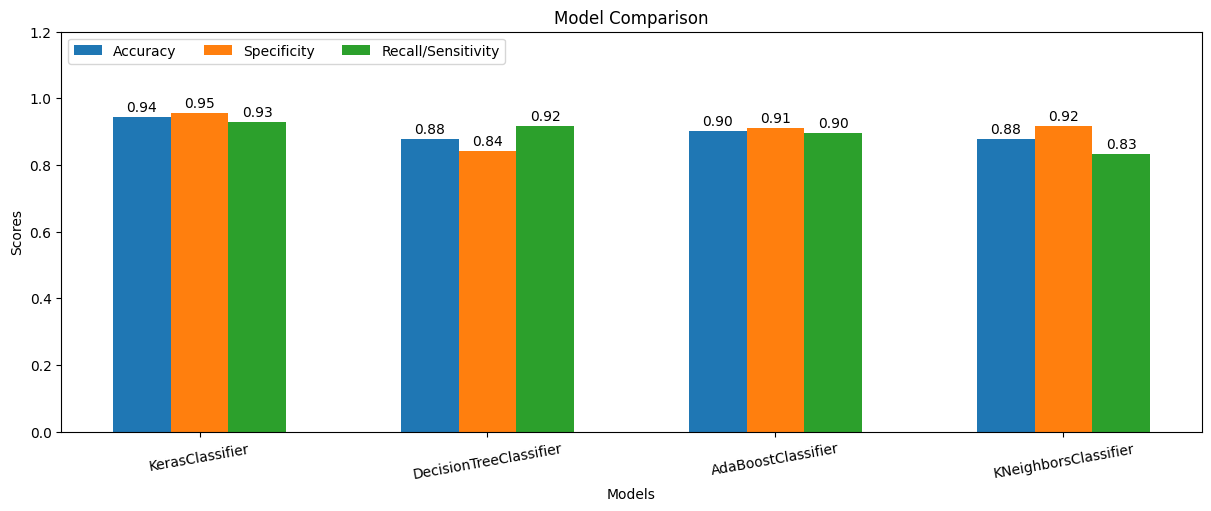

In [60]:
#Plotting the evaluation scores all models
x = np.arange(len(model_scores_only))  # the label locations
width = 0.20  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=(12,5))
#colors=['red', 'orange', 'black']

for i in model_scores_only.columns[1:4]:
    offset = width * multiplier
    rects = ax.bar(x + offset, model_scores_only[i], width, label=i)
    ax.bar_label(rects, padding=2, fmt='%.2f', label_type='edge')
    multiplier += 1

# Customizing the chart with labels and titles
ax.set_ylabel('Scores')
ax.set_xlabel('Models')
ax.set_title('Model Comparison')
ax.set_xticks(x + width, model_scores_only['Model'], rotation=10)
ax.legend(loc='upper left', ncols=7)
ax.set_ylim(0, 1.2)

plt.show()

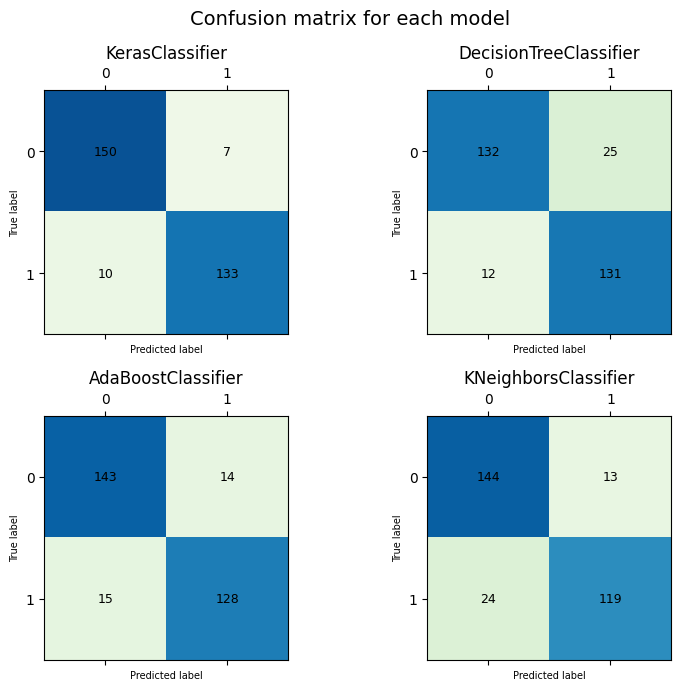

In [61]:
#Plotting the confusion matrix for each model
from matplotlib.text import Text
fig, axes = plt.subplots(2,2, figsize = (8,7))

#Using a for loop to create subplots for each variable
for i, row in model_matrix.iterrows():
    model_name = row['Model']
    cm = row['cm']
    ax=axes.flat[i]
    ax.matshow(cm, cmap = 'GnBu', vmin=0, vmax=160)

    ax.set_xlabel('Predicted label', fontsize=7)
    ax.set_ylabel('True label', fontsize=7)
    ax.set_title(model_name, fontweight=3)

    # Adding text in the matrices
    for x in range(cm.shape[0]):
        for y in range(cm.shape[1]):
            cell_value = cm[y, x]
            text = Text(x, y, f"{cell_value}", ha='center', va='center', color='black', fontsize=9)
            ax.add_artist(text)

fig.suptitle('Confusion matrix for each model', fontsize=14)
plt.tight_layout()
plt.show()

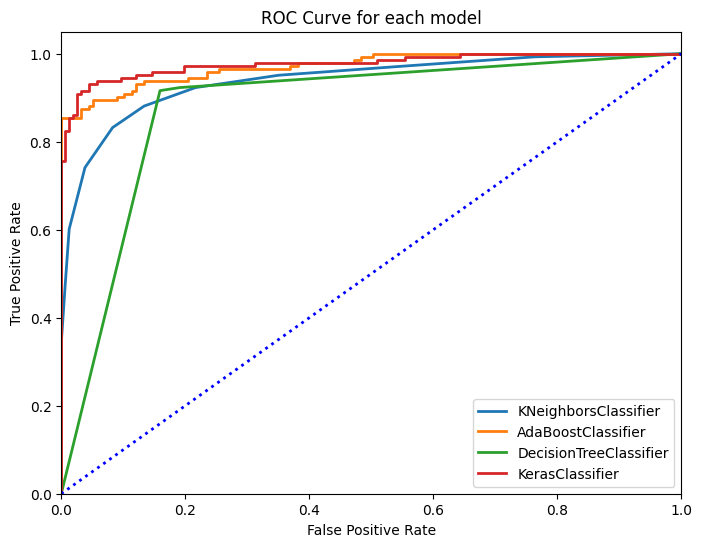

In [62]:
#Plotting the ROC curve for all models

plt.figure(figsize=(8,6))
for name, clf in final_models.items():
    fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
    plt.plot(fpr, tpr, label=f'{clf.__class__.__name__}', lw=2)
plt.plot([0, 1], [0, 1], linestyle='dotted', lw=2, color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for each model')
plt.legend()
plt.show()

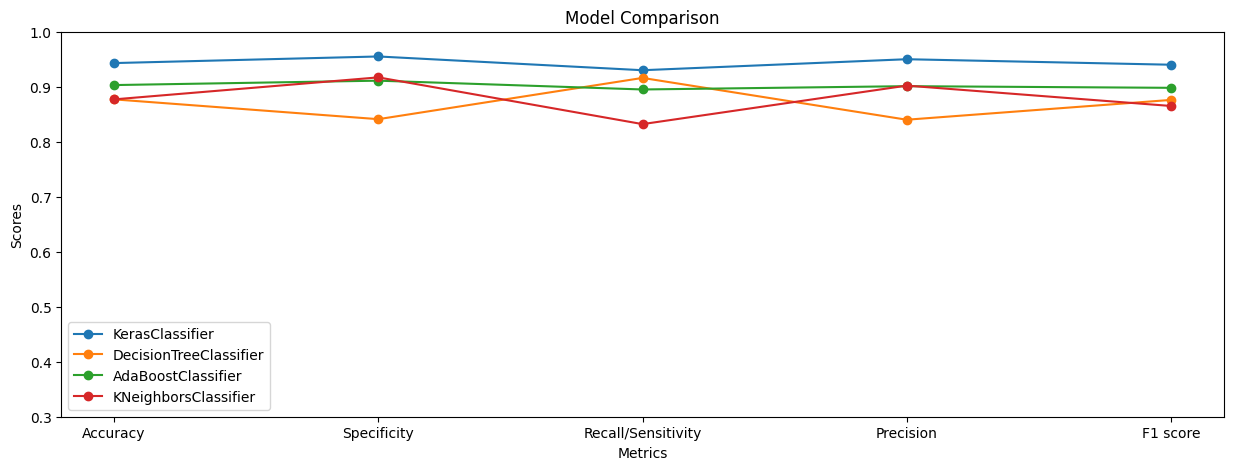

In [63]:
#Plotting a line plot to compare the model scores
plt.figure(figsize=(15,5))

for item, row in model_scores_only.iterrows():   #
  plt.plot(model_scores_only.columns[1:], row[1:], marker='o', label=row['Model'])

# Customizing the chart with labels and titles
plt.ylabel('Scores')
plt.xlabel('Metrics')
plt.title('Model Comparison')
plt.ylim(0.3,1)
plt.legend(loc='best')

plt.show()